**Example using FbProphet and airpassengers dataset**

In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 136 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.7 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638643 sha256=65afa0270380c8951602f0fd575d7e8903f40afbbe9a39b6199af94966cb5f78
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the 

# Nuova sezione

In [ ]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# 1. lettura dati
df = pd.read_csv('sample_data/AirPassengers.csv')
print(df.head(5))

     Month  AirPassengers
0  1949-01            112
1  1949-02            118
2  1949-03            132
3  1949-04            129
4  1949-05            121


In [ ]:
# 2.0 tipi di dato e nomi colonne
print(df.dtypes)
df['Month'] = pd.DatetimeIndex(df['Month'])
print(df.dtypes)
df = df.rename(columns={'Month': 'ds', 'AirPassengers': 'y'})
print(df.head(5))

Month            object
AirPassengers     int64
dtype: object
Month            datetime64[ns]
AirPassengers             int64
dtype: object
          ds    y
0 1949-01-01  112
1 1949-02-01  118
2 1949-03-01  132
3 1949-04-01  129
4 1949-05-01  121


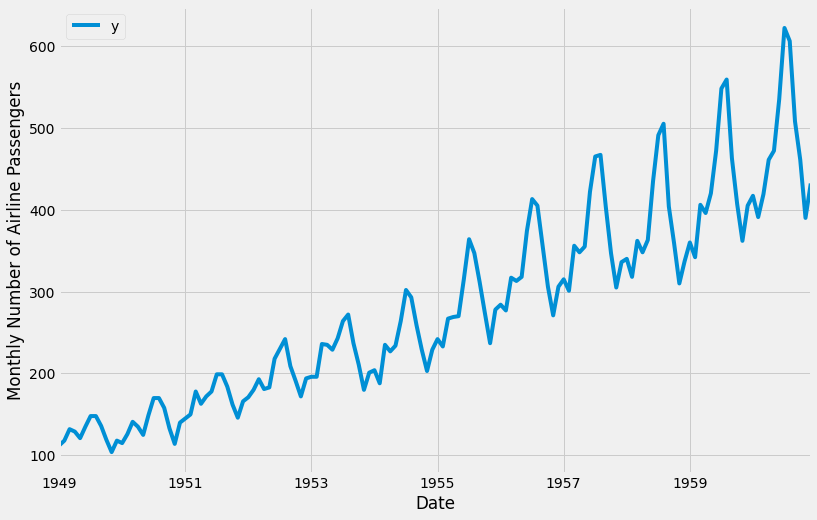

In [ ]:
#3.0 show data
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()


In [ ]:
#4.0 model creation
my_model = Prophet(interval_width=0.95, weekly_seasonality=True)

In [ ]:
#5.0 fit the data
my_model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#6.0 creation of future dataframe
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
print(future_dates.tail())

            ds
175 1963-08-01
176 1963-09-01
177 1963-10-01
178 1963-11-01
179 1963-12-01


In [ ]:
#7.0 forecast
forecast = my_model.predict(future_dates)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

            ds        yhat  yhat_lower  yhat_upper
175 1963-08-01  650.450844  604.052400  694.381617
176 1963-09-01  601.102649  556.212829  642.088124
177 1963-10-01  562.183771  521.000504  608.325862
178 1963-11-01  540.026149  498.720142  583.825854
179 1963-12-01  562.642127  519.477749  608.567343


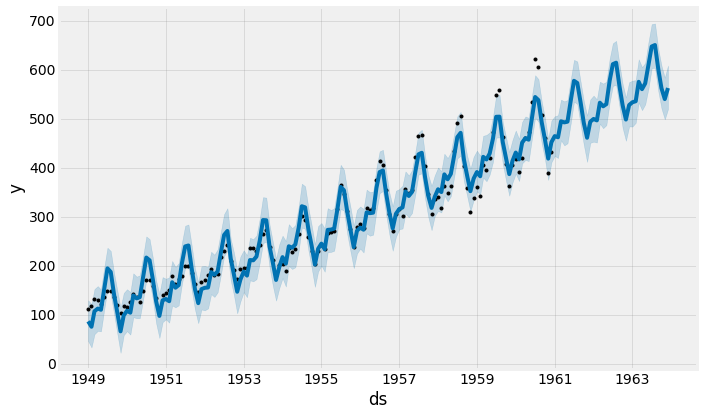

In [ ]:
#8.0 plot of the forecast
plt2 = my_model.plot(forecast, uncertainty=True)
plt2.show()

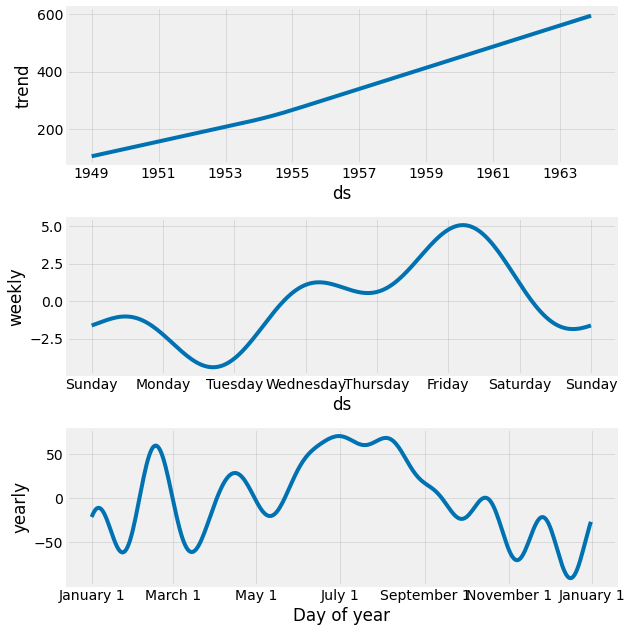

In [ ]:
plt3 = my_model.plot_components(forecast)
plt3.show()